In [1]:
########## 2 November 2018 - Alec S. Hirschauer ##########
# Today I am making a K vs J-K CMD for NGC 6822 using Python
# drawing from the Khan et al. (2015) Spitzer data set
# matched with the Sibbons et al. (2012) WFCAM/UKIRT data set.
#
# I will be implementing histograms binned by K-magnitude
# in effort to isolate where in J-K color space we should be
# placing boundaries for segregating oxygen-rich AGB stars
# from carbon-rich AGB stars.
#
# Typical values for these vertical lines are at (about):
# J-K = 0.7 (separating foreground stars from M-type/O-rich AGBS)
# J-K = 1.2 (separating M-type/O-rich AGBs from C-type/C-rich AGBs)
#
# While vertical separation lines are useful, Libby Jones is
# in favor of diagonal boundaries, which better follow the shape
# of the structure of AGB star points on the CMDs themselves.
#
# One way to investigate this is a technique Martha Boyer suggested
# from a paper by Rosenfield et al. (2016), which basically takes
# histograms as described above, but in small increments of y-axis
# (say, 0.1 magnitudes wide) to determine what the slope would be.

In [2]:
# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This line is necessary for the number density histograms.
from astropy import stats
from astropy.stats.histogram import knuth_bin_width
# This line is necessary for determining histogram bin width.

In [3]:
# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDKhanANDSibbonsHOME_ahirschauer.csv')
# This is a table of values with 30,745 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to sources from Sibbons et al. (2012)
# with an "OR" command, then downloaded from MAST CasJobs.
# print phot_data
#
# Also I'll read in the entire Sibbons+ stellar source catalog.
Sibbons_data = pd.read_csv('Sibbons2012NGC6822.csv')
# This is for a test of the histogram(s) I make later on.

In [4]:
# For the histograms, I have created new .csv files which have the specific colors'
# information: ID, RA, Dec, magnitudes, magnitude errors, color, color error.
#
# I have pre-trimmed the bogus data from these tables already, so there's no need
# to get rid of the whacky 'null' values converted to "-9999" values
# (which, when subtracted from any other value, gives another bogus value)
# like I did in the previous cell with the "full" catalog.
#
jMINUSkDATA = pd.read_csv('jMINUSk.csv')
jMINUSthreesixDATA = pd.read_csv('jMINUSthreesix.csv')
threesixMINUSeightzeroDATA = pd.read_csv('threesixMINUSeightzero.csv')
jMINUSeightzeroDATA = pd.read_csv('jMINUSeightzero.csv')
#
# After comparing cells where I made CMDs with the "filter_phot_data" data and with
# the specific colors' information above, I have found that they are the same!
# I will use these data instead of calling from the larger catalog.
#
# These two were made following a meeting with Margaret on 2 October 2018.
eightzeroMINUStwentyfourDATA = pd.read_csv('eightzeroMINUStwentyfour.csv')
fourfiveMINUSeightzeroDATA = pd.read_csv('fourfiveMINUSeightzero.csv')

In [5]:
# The first thing I'll do here is make the J vs J-K CMD & Hess diagram.

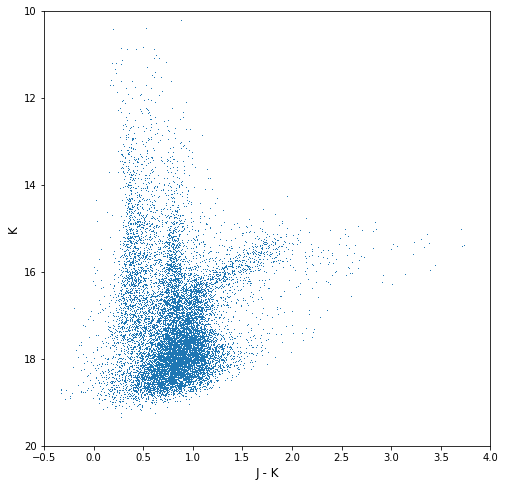

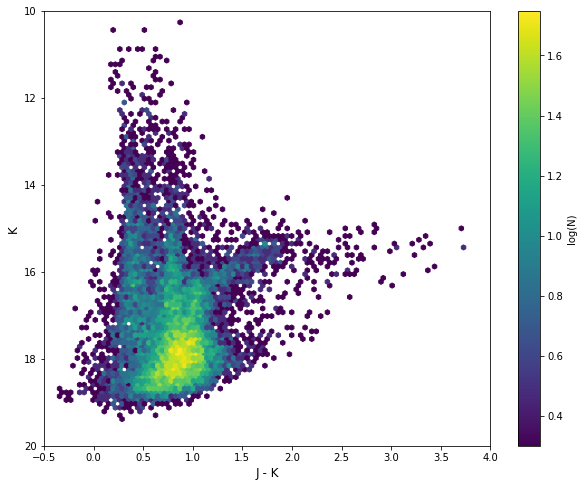

In [6]:
# K vs J-K
# CMD & Hess diagram
#
plt.figure(figsize=(8,8))
plt.plot(phot_data.jMINUSk, phot_data.Kmag, ',')
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-0.5, 4.0)
plt.ylim(20.0, 10.0)
im1 = ax1.hexbin(phot_data.jMINUSk, phot_data.Kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-0.5, 4.0, 20.0, 10.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_J-K_hist.pdf')

In [7]:
# The second thing I'll do is make the first histogram, which uses all the data
# (no restriction in K-band), so it's basically one big lump.

/Users/ahirschauer/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


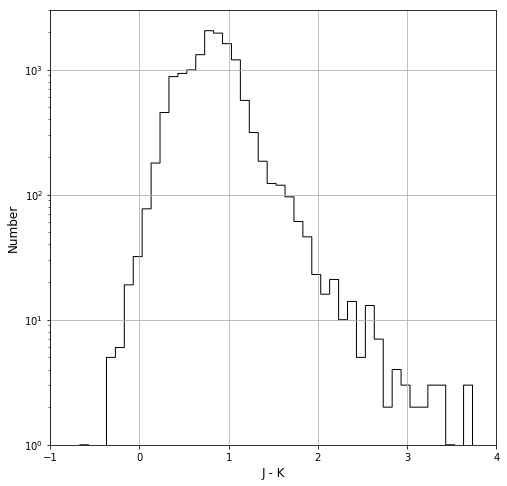

In [8]:
# J-K
# histogram
#
binwidth = 0.1
bin_number = (max(phot_data.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(phot_data.jMINUSk, bins=np.arange(min(phot_data.jMINUSk), max(phot_data.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(-1.0, 4.0)
plt.ylim(0.0, 3000.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

In [9]:
# The third thing I'll do is make a different histogram with a restricted
# K-band range, to illustrate how isolating some data can help bring out
# the details of the CMD.
#
# For a start, I'll only plot K-values between 14.0 and 16.0.

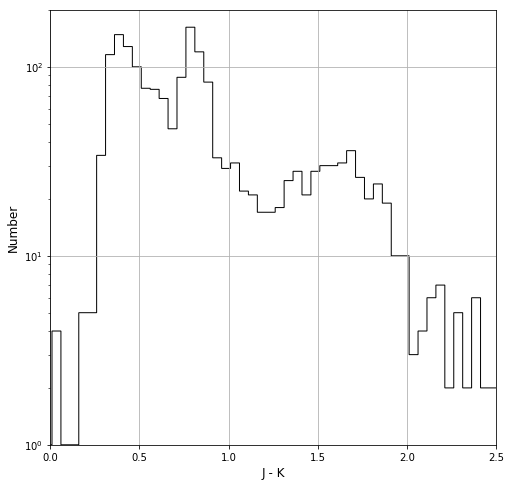

In [10]:
# J-K
# histogram (where phot_data.Kmag = 14.0 to 16.0)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST = phot_data[(phot_data.Kmag < 16.0) & (phot_data.Kmag > 14.0)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST.jMINUSk, bins=np.arange(min(jMINUSkHIST.jMINUSk), max(jMINUSkHIST.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

In [11]:
# As you can see, the inflection points are at roughly
# J-K = 0.7 and J-K = 1.2.
#
# I'd like to implement some analysis tool that will figure out
# what that value is to more precision, but also, I'll next make
# progressive histograms which use a more restricted K-band range
# to see where these inflection points will be up the CMD.

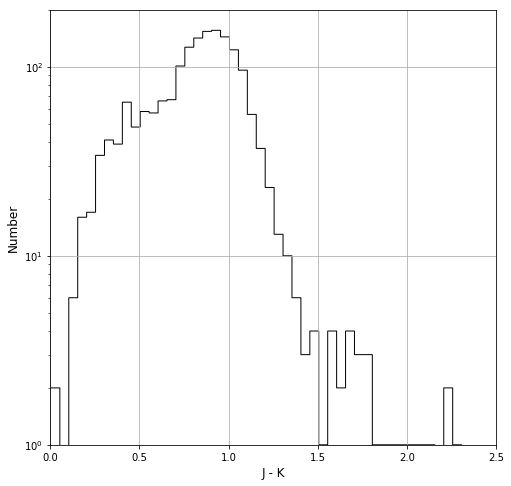

In [12]:
# J-K
# histogram (where phot_data.Kmag = 17.5 to 17.0)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST1 = phot_data[(phot_data.Kmag < 17.5) & (phot_data.Kmag > 17.0)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST1.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST1.jMINUSk, bins=np.arange(min(jMINUSkHIST1.jMINUSk), max(jMINUSkHIST1.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

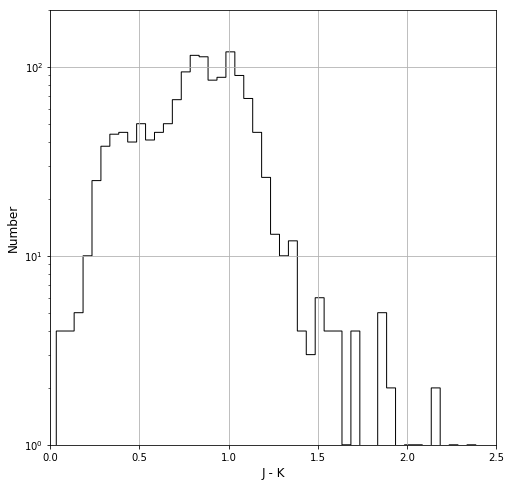

In [13]:
# J-K
# histogram (where phot_data.Kmag = 17.0 to 16.5)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST2 = phot_data[(phot_data.Kmag < 17.0) & (phot_data.Kmag > 16.5)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST2.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST2.jMINUSk, bins=np.arange(min(jMINUSkHIST2.jMINUSk), max(jMINUSkHIST2.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

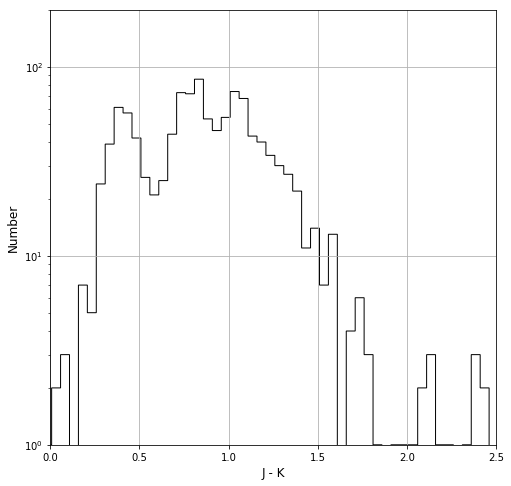

In [14]:
# J-K
# histogram (where phot_data.Kmag = 16.5 to 16.0)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST3 = phot_data[(phot_data.Kmag < 16.5) & (phot_data.Kmag > 16.0)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST3.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST3.jMINUSk, bins=np.arange(min(jMINUSkHIST3.jMINUSk), max(jMINUSkHIST3.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

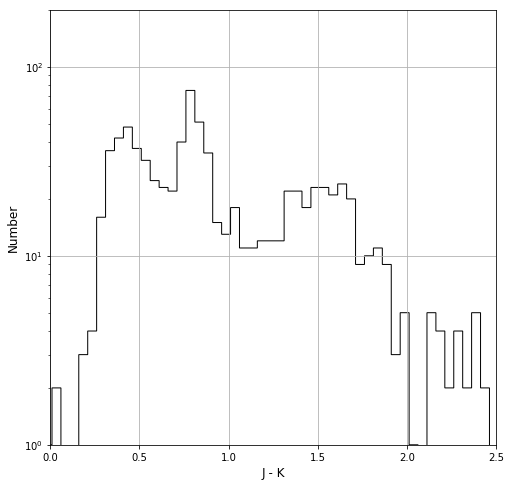

In [15]:
# J-K
# histogram (where phot_data.Kmag = 16.0 to 15.5)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST4 = phot_data[(phot_data.Kmag < 16.0) & (phot_data.Kmag > 15.5)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST4.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST4.jMINUSk, bins=np.arange(min(jMINUSkHIST4.jMINUSk), max(jMINUSkHIST4.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

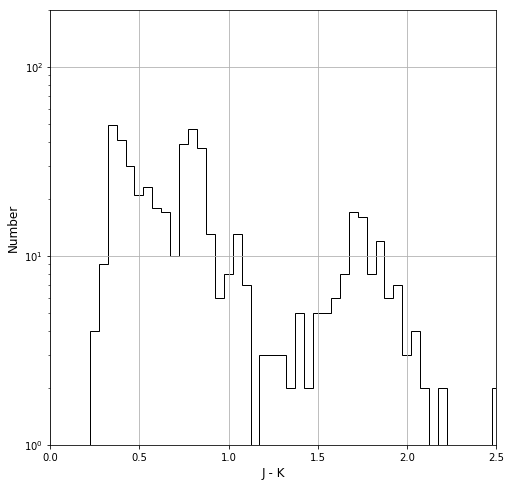

In [16]:
# J-K
# histogram (where phot_data.Kmag = 15.5 to 15.0)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST5 = phot_data[(phot_data.Kmag < 15.5) & (phot_data.Kmag > 15.0)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST5.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST5.jMINUSk, bins=np.arange(min(jMINUSkHIST5.jMINUSk), max(jMINUSkHIST5.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

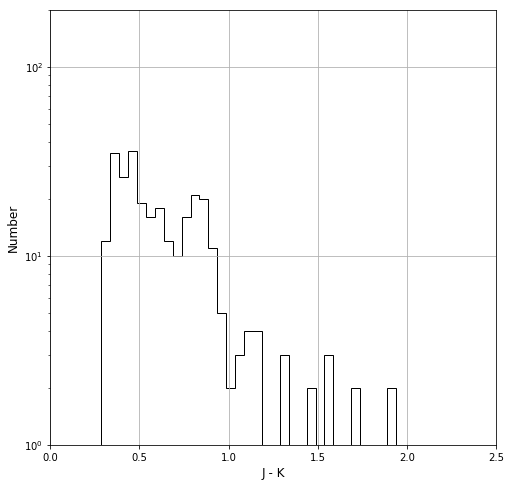

In [17]:
# J-K
# histogram (where phot_data.Kmag = 15.0 to 14.5)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST6 = phot_data[(phot_data.Kmag < 15.0) & (phot_data.Kmag > 14.5)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST6.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST6.jMINUSk, bins=np.arange(min(jMINUSkHIST6.jMINUSk), max(jMINUSkHIST6.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

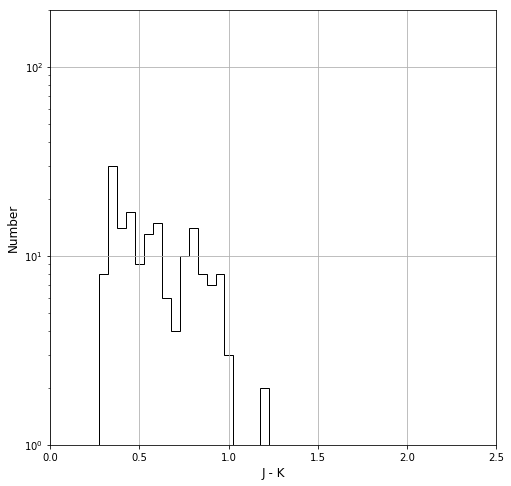

In [18]:
# J-K
# histogram (where phot_data.Kmag = 14.5 to 14.0)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST7 = phot_data[(phot_data.Kmag < 14.5) & (phot_data.Kmag > 14.0)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST7.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST7.jMINUSk, bins=np.arange(min(jMINUSkHIST7.jMINUSk), max(jMINUSkHIST7.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

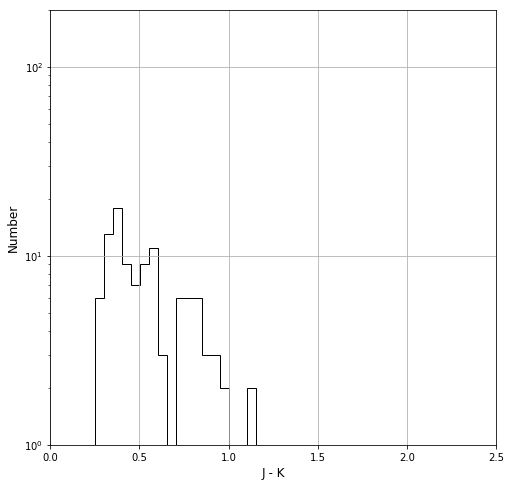

In [19]:
# J-K
# histogram (where phot_data.Kmag = 14.0 to 13.5)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST8 = phot_data[(phot_data.Kmag < 14.0) & (phot_data.Kmag > 13.5)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST6.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST8.jMINUSk, bins=np.arange(min(jMINUSkHIST8.jMINUSk), max(jMINUSkHIST8.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()

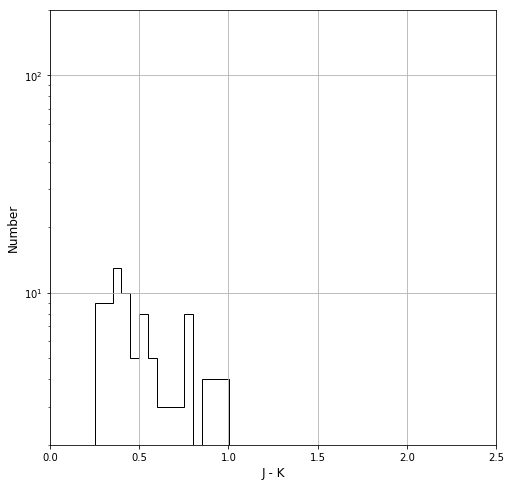

In [20]:
# J-K
# histogram (where phot_data.Kmag = 13.5 to 13.0)
#
# Plus with a narrower binwidth of 0.05.
#
jMINUSkHIST9 = phot_data[(phot_data.Kmag < 13.5) & (phot_data.Kmag > 13.0)]
#
#print jMINUSkHIST.Kmag
#print jMINUSkHIST.jMINUSk
#
binwidth = 0.05
bin_number = (max(jMINUSkHIST9.jMINUSk)+binwidth)/binwidth
# print bin_number
# bw = stats.knuth_bin_width(star_cat[phot_data.Kmag])
# print bw
#
fig = plt.figure(figsize = (8,8))
plt.hist(jMINUSkHIST9.jMINUSk, bins=np.arange(min(jMINUSkHIST9.jMINUSk), max(jMINUSkHIST9.jMINUSk) + binwidth, binwidth), histtype='step', color='black')
plt.yscale('log', nonposy='clip')
plt.xlim(0.0, 2.5)
plt.ylim(0.0, 200.0)
plt.xlabel('J - K', size=12)
plt.ylabel('Number', size=12)
plt.grid(True)
plt.show()
plt.close()